# Ejercicio 2
## Se observa el comportamiento de una regresión lineal cuando se presenta multicolinearidad en los datos
Inciso 1

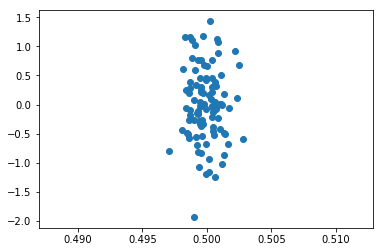

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
X = np.zeros((100,2),dtype = float)
Y = np.zeros(100)
for i in range(100):
    X[i] = np.random.multivariate_normal([0,0.5],[[0.36,0.000002],[0.000002,0.000001]])
    Y[i] = X[i,0]
    X[i,0] = 1
  
plt.scatter(X[:,1],Y)

plt.show()

Inciso 2

Sabemos que 
$$
f_{Y|X}(Y) = \frac{f_{x,y}(x,y)}{f_{x}(x)}
$$
y que la distribución conjunta viene dada por la exponencial. 

Al calular la esperanza condicional de Y dado X obtenemos
$$
E(Y|X) = sgn(\rho)\frac{\sigma_{x}}{\sigma_{y}}(X - \mu_{x}) +\mu_{y}
$$

Por tanto

$\alpha_{0} = -300$

$\beta_{0} = 600$




Inciso 3


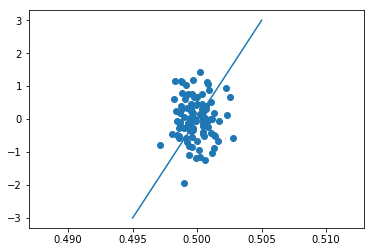

In [103]:
x2 = np.linspace(0.495,0.505,100)
y2 = -300 + 600*x2
plt.scatter(X[:,1],Y)
plt.plot(x2,y2)
plt.show()

Inciso IV

In [104]:
X_trans = np.transpose(X)
det = np.linalg.det(np.dot(X_trans,X)) 
print "El determinante de la matríz X´X es: ", det
print "La matriz X es:"
print X
print "La matriz (X'X) inversa es:"
print np.linalg.inv(np.dot(X_trans,X))
print "Hay multicolinearidad"

El determinante de la matríz X´X es:  0.0109651599224
La matriz X es:
[[ 1.          0.49881782]
 [ 1.          0.5008896 ]
 [ 1.          0.49901133]
 [ 1.          0.50131458]
 [ 1.          0.49808046]
 [ 1.          0.49979905]
 [ 1.          0.49817122]
 [ 1.          0.50103769]
 [ 1.          0.5006511 ]
 [ 1.          0.50130424]
 [ 1.          0.50253384]
 [ 1.          0.5002905 ]
 [ 1.          0.50041451]
 [ 1.          0.50086641]
 [ 1.          0.49949528]
 [ 1.          0.5006874 ]
 [ 1.          0.50000627]
 [ 1.          0.49974829]
 [ 1.          0.50060217]
 [ 1.          0.49867233]
 [ 1.          0.49860681]
 [ 1.          0.49869902]
 [ 1.          0.50041397]
 [ 1.          0.49959797]
 [ 1.          0.49971017]
 [ 1.          0.50108146]
 [ 1.          0.50017905]
 [ 1.          0.49940259]
 [ 1.          0.49930884]
 [ 1.          0.49926132]
 [ 1.          0.49871763]
 [ 1.          0.50075531]
 [ 1.          0.49901103]
 [ 1.          0.50160838]
 [ 1.       

Inciso V

In [107]:
mod = sm.OLS(Y,X)
res = mod.fit()
print(res.summary())
print "Por tanto la variancia de los términos de error var(e) es:", np.sqrt(res.uncentered_tss/98)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                 0.0001478
Date:                Sun, 26 Nov 2017   Prob (F-statistic):              0.990
Time:                        13:51:44   Log-Likelihood:                -94.431
No. Observations:                 100   AIC:                             192.9
Df Residuals:                      98   BIC:                             198.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.3678     30.001     -0.012      0.9

Inciso 6 y 7
Los intervalos de confianza del 95% vienen indicados en la tabla anterior:

$\alpha$  $\epsilon$  $[-59.904,59.169]$ 


$\beta$  $\epsilon$  $[-118.365,119.825]$


Inciso 8

a)

Calculemos el t valor para $\alpha = 1$, para tener una confianza del 95% de que la hipotesis es verdadera necesitamos que el t valor sea menor a  1.9845 

In [108]:
t = (-0.3678 -1)/(0.628437623187*np.sqrt(2279.12110863))
print t

-0.0455907482726


Se acepta la hipótesis de que $\alpha_{0}$ sea 1 con una significancia del 5%

b)

Calculemos el t valor para $\alpha = -4$, para tener una confianza del 95% de que la hipotesis es verdadera necesitamos que el t valor sea menor a  1.9845 

In [112]:
t = (-0.3678 +4)/(0.628437623187*np.sqrt(2279.12110863))
print t

0.121066468691


Se acepta la hipótesis de que $\alpha_{0}$ sea 4 con una significancia del 5%

Inciso 9

Calculemos el t valor para $\beta = 0$, para tener una confianza del 95% de que la hipotesis es verdadera necesitamos que el t valor sea menor a  1.9845 

In [111]:
t = (0.7297)/(0.628437623187*np.sqrt(9119.79403011))
print t

0.0121587702974


Se acepta la hipótesis de que beta es 0 con significancia del 5%

Calculemos el t valor para $\beta = -2$, para tener una confianza del 95% de que la hipotesis es verdadera necesitamos que el t valor sea menor a  1.9845 

In [113]:
t = (0.7297+2)/(0.628437623187*np.sqrt(9119.79403011))
print t

0.0454841651102


Se acepta la hipótesis de que beta es 0 con significancia del 5%

Inciso 10

In [64]:
for i in range(4):
    X = np.zeros((100,2),dtype = float)
    Y = np.zeros(100)
    for i in range(100):
        X[i] = np.random.multivariate_normal([0,0.5],[[0.36,0.000002],[0.000002,0.000001]])
        Y[i] = X[i,0]
        X[i,0] = 1
    mod = sm.OLS(Y,X)
    res = mod.fit()
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4114
Date:                Sun, 26 Nov 2017   Prob (F-statistic):              0.523
Time:                        12:58:58   Log-Likelihood:                -95.489
No. Observations:                 100   AIC:                             195.0
Df Residuals:                      98   BIC:                             200.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         21.1003     32.940      0.641      0.5

Los valores son bastante diferentes a los reales y entre ellos

# Ejercicio 3
## Se genera un conjunto de datos sumando una variable lineal y una variable aleatoria con distribución gaussiana.
## Se analiza la tendencia lineal de los datos generados.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [48]:
class Ut:
    ut = np.zeros(700)

    def get(self,index):
        return self.ut[index+500]
    def set(self,index,number):
        self.ut[index+500] = number


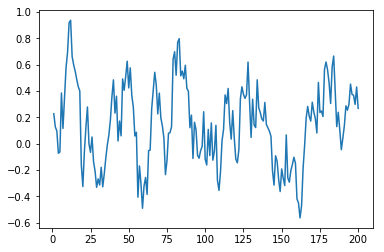

In [49]:

Et = Ut()
for i in range(-500,200):
    s =np.random.normal(0,0.2)
    Et.set(i,s)
    
    
Ut = Ut()
Ut.set(-500,0)
for i in range(-499,200):
    Ut.set(i,0.9*Ut.get(i-1)+Et.get(i))
plotUt = np.zeros(200)
for i in range(0,200):
    plotUt[i] = Ut.get(i)
plt.plot(range(1,201),plotUt)
plt.show()

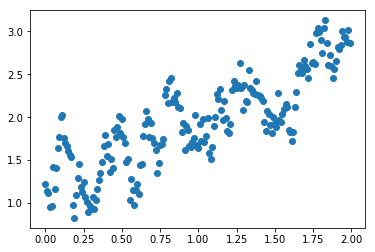

In [58]:
X = np.zeros(200)
Y = np.zeros(200)
for i in range(0,200):
    X[i] = i/100.
    Y[i] = 1 + 0.8*X[i] + Ut.get(i)
plt.plot(X,Y,'o')
plt.show()

In [72]:
Xm = np.zeros((200,2))
for i in range(200):
    Xm[i,0] = 1
    Xm[i,1] = X[i]
mod = sm.OLS(Y,Xm)
res = mod.fit()
print(res.summary())
print "Por tanto la variancia de los términos de error sigma u es:", np.sqrt(res.uncentered_tss/98.)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     438.2
Date:                Sun, 26 Nov 2017   Prob (F-statistic):           4.46e-52
Time:                        18:06:14   Log-Likelihood:                -44.761
No. Observations:                 200   AIC:                             93.52
Df Residuals:                     198   BIC:                             100.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1654      0.043     27.193      0.0

In [71]:
C =  np.zeros((200,200))
C[0,0] = np.sqrt(1-0.9**2)
for i in range(1,200):
    C[i,i-1] = 0.9
    C[i,i] = 1
C = (1./np.sqrt(1-0.9**2))
modGLS = sm.GLS(np.dot(C,Y),np.dot(C,Xm))
resGLS = mod.fit()
print(res.summary())
print "Por tanto la variancia de los términos de error sigma u es:", np.sqrt(res.uncentered_tss/98.)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     438.2
Date:                Sun, 26 Nov 2017   Prob (F-statistic):           4.46e-52
Time:                        18:02:13   Log-Likelihood:                -44.761
No. Observations:                 200   AIC:                             93.52
Df Residuals:                     198   BIC:                             100.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1654      0.043     27.193      0.0

Inciso 6

In [73]:
print np.linalg.inv(np.dot(np.transpose(Xm),Xm))

[[ 0.01985075 -0.01492537]
 [-0.01492537  0.01500038]]


In [74]:
t = (0.7799 -1.)/(2.87964860744*np.sqrt(0.01500038))
print t

-0.624064410856


para rechazar la hipotesis $b_{2} = 1$ con el 5% de significancia se necesta que |t| > 1.962 pero no es así entonces aprobamos la hipotesis $b_{2} = 1$ con significancia del 5%

Inciso 7

In [77]:
t = (1.1654 -1.2)/(2.87964860744*np.sqrt(0.01985075))
print t

-0.0852801868352


Para rechazar la hipotesis $b_{1} = 1.2$ con el 5% de significancia se necesta que |t| > 1.962 pero no es así entonces aprobamos la hipotesis $b_{1} = 1.2$ con significancia del 5%

Inciso 8



In [80]:
C = [1,1]
XtXinv = np.linalg.inv(np.dot(np.transpose(Xm),Xm))
CtX = np.dot(np.transpose(C),XtXinv)
CtXtXC = np.dot(CtX,C)
print CtXtXC
t = ( 1.9453 - 1.9)/(2.87964860744*np.sqrt(CtXtXC))
print t

0.00500037500938
0.222462809836


Para rechazar la hipotesis $b_{1} + b_{2} = 1.9$ con el 10% de significancia se necesta que |t| > 1.660 pero no es así entonces aprobamos la hipotesis $b_{1} + b_{2} = 1.9$ con significancia del 10%

Inciso 9

In [86]:
R = [[1,0],[0,1]]
rb = [1.1654,0.7799]
RXtXinv = np.dot(R,XtXinv)
RXtXinvRt = np.dot(RXtXinv,np.transpose(R))
RXtXinvRtinv = np.transpose(RXtXinvRt)
rbtRt = np.dot(np.transpose(rb),np.transpose(R))
rbtRRXtXinvRtinv = np.dot(rbtRt,RXtXinvRtinv)
rbtRRXtXinvRtinvRrb = np.dot(rbtRRXtXinvRtinv,np.transpose(rbtRt))

f = rbtRRXtXinvRtinvRrb/(1*2.87964860744)
print f

0.00310909936685


Para rechazar la hipotesis  con el 5% de significancia se necesta que |f| >  3.9201 pero no es así entonces aprobamos la hipotesis con significancia del 5%

# Ejercicio 4
## Se utilizan los datos de el consumo de energía eléctrica del pais
## Se cosntruye un modelo para describir el consumo de energía eléctrica del pais tomando en cuenta la estacionalidad presente.

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [250]:
dataset = pd.read_csv('DatosProblema4.csv')
X = dataset.iloc[:,0:2].values
Y = dataset.iloc[:,2].values

In [251]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [252]:
labelEncoder_X = LabelEncoder()
X[:,0] = labelEncoder_X.fit_transform(X[:,0])
oneHotEncoder = OneHotEncoder(categorical_features=[0])
X = oneHotEncoder.fit_transform(X).toarray()

Z = np.zeros(Y.size)
for i in range(96):
    Z[i] = 1
A = np.copy(X)
X = np.zeros((96,13))
X[:,0] = Z
X[:,1:12] = A[:,0:11]
X[:,12] = A[:,12]

In [253]:
print labelEncoder_X.classes_
labelEncoder_X.inverse_transform(1)


['Abril' 'Agosto' 'Diciembre' 'Enero' 'Febrero' 'Julio' 'Junio' 'Marzo'
 'Mayo' 'Noviembre' 'Octubre' 'Septiembre']


'Agosto'

In [254]:
#mod = sm.OLS('Consumo ~ Abril + Agosto + Diciembre + Enero + Febrero + Julio + Junio + Marzo + Mayo + Noviembre + Octubre + Septiembre + Año', Y,X)
mod = sm.OLS(Y,X)
res = mod.fit()
print(res.summary())
print "Por tanto la variancia de los términos de error var(e) es:", np.sqrt(res.uncentered_tss/13)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     90.41
Date:                Sun, 26 Nov 2017   Prob (F-statistic):           2.23e-42
Time:                        20:58:15   Log-Likelihood:                -569.65
No. Observations:                  96   AIC:                             1165.
Df Residuals:                      83   BIC:                             1199.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -1.834e+05   8791.235    -20.858      0.0



['Abril' 'Agosto' 'Diciembre' 'Enero' 'Febrero' 'Julio' 'Junio' 'Marzo'
 'Mayo' 'Noviembre' 'Octubre' 'Septiembre']


In [259]:
def predictionMonthyear(month,year):
    a = 0
    if(month == "Abril"):
        a = -683.750
    elif(month == "Agosto"):
        a = -50.6250
    elif(month == "Diciembre"):
        a = -513.6250
    elif(month == "Enero"):
        a = -589.2500 
    elif(month == "Febrero"):
        a = -617.2500  
    elif(month == "Julio"):
        a = -119.2500
    elif(month == "Junio"):
        a = -282.5000
    elif(month == "Marzo"):
        a = -745.5000
    elif(month == "Mayo"):
        a = -452.1250
    elif(month == "Noviembre"):
        a = -302.3750
    elif(month == "Octubre"):
        a = -96.7500
    else:
        a = 0.
    return -1.834e+05 + a + 92.9921*year

In [268]:
for year in [2013]:
    for month in ['Abril','Agosto','Diciembre','Enero','Febrero','Julio','Junio','Marzo',
 'Mayo' ,'Noviembre', 'Octubre', 'Septiembre']:
        print month + "\t\t\t", predictionMonthyear(month,year), "\r"

Abril			3109.3473 
Agosto			3742.4723 
Diciembre			3279.4723 
Enero			3203.8473 
Febrero			3175.8473 
Julio			3673.8473 
Junio			3510.5973 
Marzo			3047.5973 
Mayo			3340.9723 
Noviembre			3490.7223 
Octubre			3696.3473 
Septiembre			3793.0973 


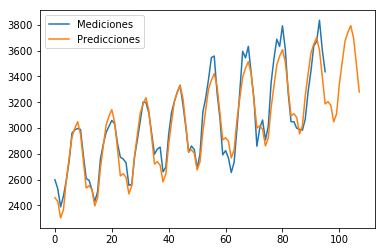

In [276]:
medida = dataset.iloc[:,2].values
prediccion = np.zeros(108)
x_med = range(0,96)
x_pred = range(0,108)
i = 0
for year in range(2005,2014):
        for month in ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]:
            prediccion[i] = predictionMonthyear(month,year)
            i = i +1
    
            

plt.plot(x_med,medida, label = 'Mediciones')
plt.plot(x_pred, prediccion, label = 'Predicciones')
plt.legend()
plt.show()
        
    

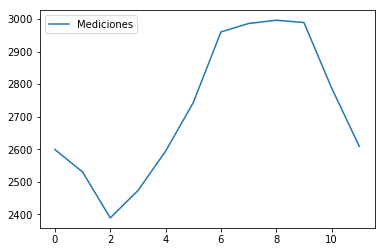

In [283]:
medida_p = dataset.iloc[0:12,2].values
x_med_p = range(0,12)
plt.plot(x_med_p,medida_p, label = 'Mediciones')
plt.legend()
plt.show()